<h3 style='color: blue; text-align: center'> Import Libraries</h3>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h4 style='color: red; text-align: center'>Import DataSet</h4>

In [2]:
df=pd.read_csv('D:\Veri_Madenciliği_Ödev\VM_Odev_ID3_Algorithm\diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


<h2 style='color: blue; text-align: center'>Data cleaning</h2>

In [3]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [4]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [5]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [6]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [9]:
df['age'].value_counts().sort_index()

age
0.08       36
0.16       59
0.24       87
0.32       89
0.40       66
         ... 
76.00     733
77.00     730
78.00     682
79.00     621
80.00    5621
Name: count, Length: 102, dtype: int64

<h4 style='color: red; text-align: center'>Function to display ages with decimal values</h4>

In [10]:
def display_decimal_age(df):
    
    # Identify rows containing decimal numbers // Ondalık sayılar içeren satırları belirleyin
    decimal_age_rows = df[df['age'].notnull() & df['age'] % 1 != 0]
    
    # Display only the "age" column of these rows  // Yalnızca bu satırların "age" sütununu gösterin
    decimal_age = decimal_age_rows['age']
    
    return decimal_age


decimal_age = display_decimal_age(df)
print(decimal_age)

155      0.08
218      0.56
241      0.88
268      0.16
396      0.16
         ... 
99536    0.40
99629    0.64
99778    0.32
99911    0.32
99916    1.48
Name: age, Length: 2018, dtype: float64


In [11]:
decimal_age.value_counts().sort_index()

age
0.08     36
0.16     59
0.24     87
0.32     89
0.40     66
0.48     83
0.56     96
0.64     99
0.72    104
0.80    102
0.88     90
1.08     95
1.16     89
1.24     90
1.32    103
1.40    101
1.48    107
1.56    113
1.64    118
1.72     97
1.80    108
1.88     86
Name: count, dtype: int64

In [12]:
len(decimal_age)

2018

<h4 style='color: red; text-align: center'>Convert the values of decimal ages to integers</h4>

In [13]:
df.age.loc[2049]

0.08

In [14]:
df.age.value_counts().sort_index()

age
0.08       36
0.16       59
0.24       87
0.32       89
0.40       66
         ... 
76.00     733
77.00     730
78.00     682
79.00     621
80.00    5621
Name: count, Length: 102, dtype: int64

In [15]:
df.shape

(100000, 9)

In [16]:
df_copy=df.copy()

In [17]:
df_copy.shape

(100000, 9)

<h4 style='color: red; text-align: center'>Remove the value Other from the gender column</h4>

In [18]:
df=df[df['gender']!='Other']
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [19]:
df.shape

(99982, 9)

<h4 style='color: red; text-align: center'>Remove the value No Info from the smoking_history column</h4>

In [20]:
df=df[df['smoking_history']!='No Info']
df.shape

(64172, 9)

In [21]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,64172.000000,64172.000000,64172.000000,64172.000000,64172.000000,64172.000000,64172.000000
mean,46.547268,0.097909,0.047045,28.424262,5.564279,139.629792,0.109799
std,19.539695,0.297194,0.211738,6.515975,1.095535,42.166693,0.312641
min,0.160000,0.000000,0.000000,10.080000,3.500000,80.000000,0.000000
25%,31.000000,0.000000,0.000000,24.600000,4.800000,100.000000,0.000000
50%,47.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,61.000000,0.000000,0.000000,31.100000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,91.820000,9.000000,300.000000,1.000000


<h4 style='color: red; text-align: center'>Some graphs for Data visualization</h4>

Text(0.5, 1.0, 'Gender')

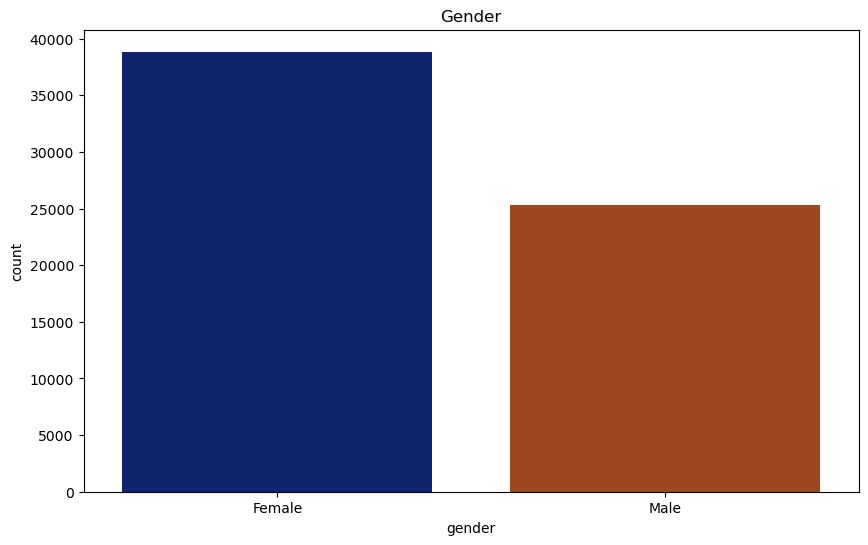

In [22]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(x='gender', data=df, palette="dark")
plt.title("Gender")

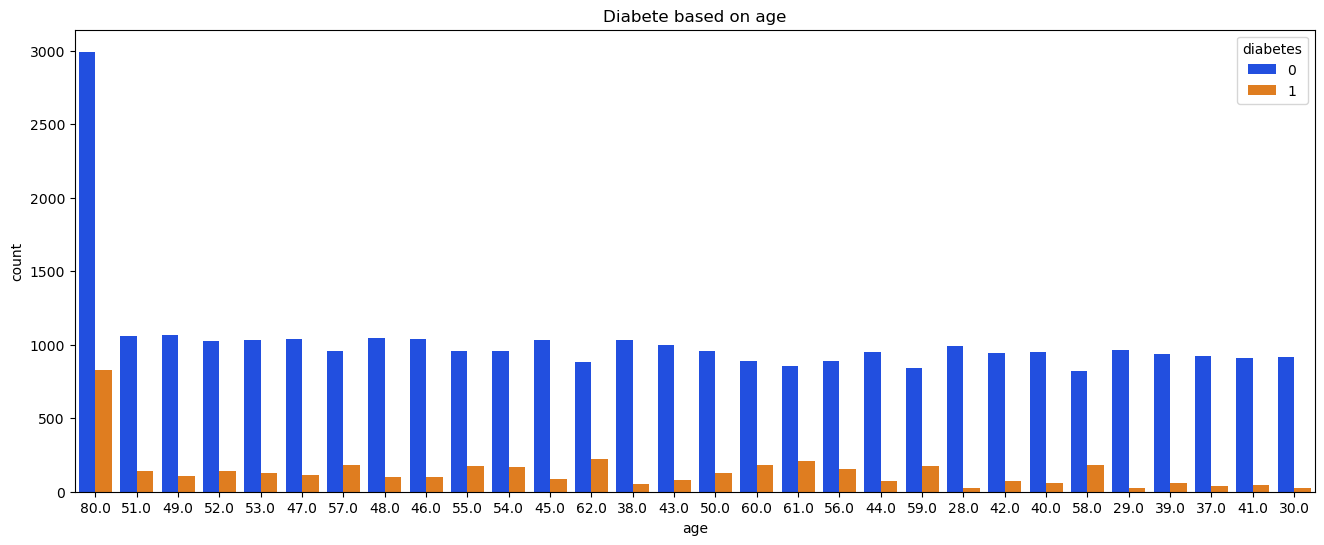

In [23]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x='age', hue='diabetes', data=df, palette='bright', order=df['age'].value_counts().index[0:30])
plt.title("Diabete based on age")
plt.show()

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

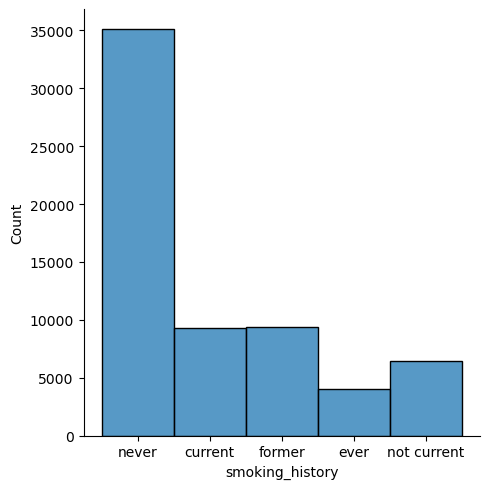

In [24]:
plt.figure(figsize=(10,5))
sns.displot(df['smoking_history'])

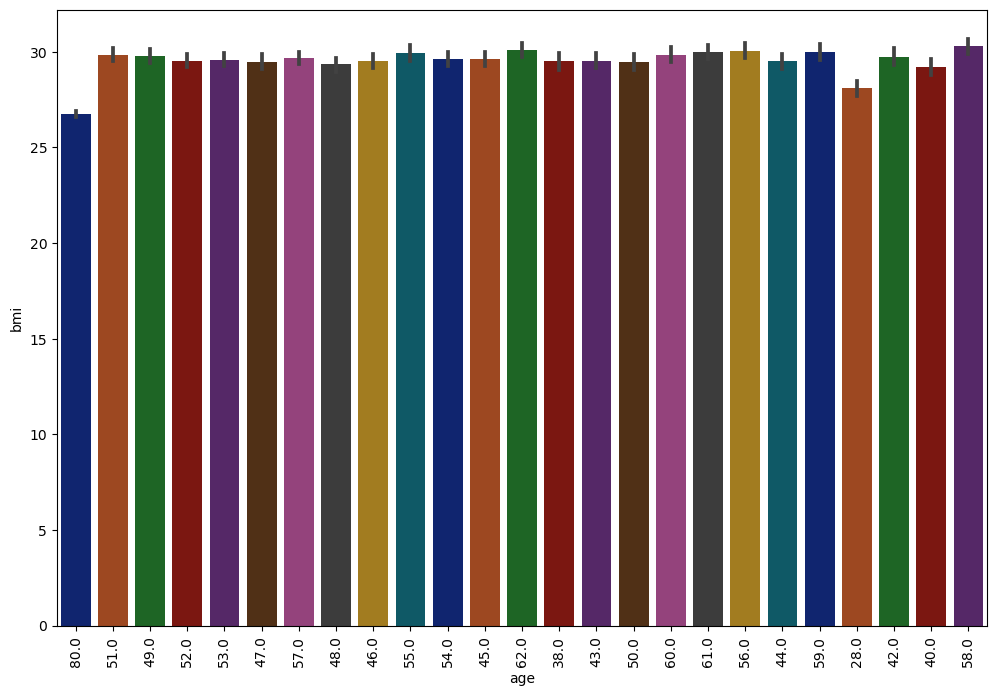

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df['age'], y=df['bmi'], order=df['age'].value_counts().index[0:25], palette='dark')
plt.xticks(rotation='vertical')
plt.show()

<h2 style='color: blue; text-align: center'>Preprocessing of data(Veri Önişleme)</h2>

In [26]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

<h4 style='color: red; text-align: center'> Encoding the categorical data labels into numerical values for the "age" and "smoking_history" columns("age" ve "smoking_history" sütunlarındaki kategorik veri etiketlerini sayısal değerlere dönüştürme).</h4>

In [27]:
from sklearn.preprocessing import LabelEncoder
le_gender=LabelEncoder()
le_smoking_history=LabelEncoder()

In [28]:
df.gender=le_gender.fit_transform(df['gender'])
df.smoking_history=le_smoking_history.fit_transform(df['smoking_history'])
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,3,25.19,6.6,140,0
2,1,28.0,0,0,3,27.32,5.7,158,0
3,0,36.0,0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,0,20.14,4.8,155,0
5,0,20.0,0,0,3,27.32,6.6,85,0


<h2 style='color: blue; text-align: center'>ID3 Algorithm </h2>

In [29]:
t = df.keys()[-1]                          # Our target column is the "diabetes" column.
print('Target Attribute is   ➡ ', t)

Target Attribute is   ➡  diabetes


In [30]:
attribute_name = list(df.keys())
attribute_name.remove(t) 
print('Predicting Attributes ➡ ', attribute_name)

Predicting Attributes ➡  ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']


<h4 style='color: red; text-align: center'>The formula for entropy</h4>

In [31]:
import math
def entropy(probs):  
    return sum( [-prob*math.log(prob, 2) for prob in probs])

<h4 style='color: red; text-align: center'>Function to calulate the entropy of the Datasets with respect to target attributes</h4>

In [32]:
def entropy_of_list(ls,value):  
    from collections import Counter  #Allows counting occurrences of elements in a sequence(Bir dizideki öğelerin tekrarlarını saymayı sağlar)
    
    total_instances = len(ls)  
    print("---------------------------------------------------------")
    print("\nTotal 0 of instances/records associated with '{0}' is ➡ {1}".format(value,total_instances))
    # Counter calculates the propotion of class
    cnt = Counter(x for x in ls)
    print('\nTarget attribute class count(1/0)=',dict(cnt))
    
    # x means 0 of 1/0 (Diabetes)
    probs = [x / total_instances for x in cnt.values()]  
    print("\nClasses➡", max(cnt), min(cnt))
    print("\nProbabilities of Class 'p'='{0}' ➡ {1}".format(max(cnt),max(probs)))
    print("Probabilities of Class 'n'='{0}'  ➡ {1}".format(min(cnt),min(probs)))
    
    # Call Entropy 
    return entropy(probs) 

<h4 style='color: red; text-align: center'>Function to calulate the Information Gain</h4>

In [33]:
def information_gain(df, split_attribute, target_attribute,battr):
    print("\n\n----- Information Gain Calculation of",split_attribute,"----- ") 
    
    # group the data based on attribute values
    df_split = df.groupby(split_attribute) 
    glist=[]    #Initialize an empty list
    
    """gname représente la valeur de l'attribut de division pour le groupe actuel,
    et group est le DataFrame contenant les lignes correspondant à cette
    valeur."""
    
    for gname,group in df_split:
        print('Grouped Attribute Values \n',group)
        print("---------------------------------------------------------")
        glist.append(gname) 
    
    glist.reverse()
    nobs = len(df.index) * 1.0   
    df_agg1=df_split.agg({target_attribute:lambda x:entropy_of_list(x, glist.pop())})
    df_agg2=df_split.agg({target_attribute :lambda x:len(x)/nobs})
    
    df_agg1.columns=['Entropy']
    df_agg2.columns=['Proportion']
    
    # Calculate Information Gain:
    new_entropy = sum( df_agg1['Entropy'] * df_agg2['Proportion'])
    if battr !='S':
        target_entropy_name = 'S-' + str(df.iloc[0][df.columns.get_loc(battr)])
        old_entropy = entropy_of_list(df[target_attribute], target_entropy_name)
    else:
        old_entropy = entropy_of_list(df[target_attribute],battr)
    return old_entropy - new_entropy

<h4 style='color: red; text-align: center'>Function to implement the ID3 (Iterative Dichotomiser 3) algorithm for constructing decision trees.</h4>

In [34]:
def id3(df, target_attribute, attribute_names, default_class=None,default_attr='S'):
    
    from collections import Counter
    cnt = Counter(x for x in df[target_attribute])# class of 1/0
    
    # First check: Is this split of the dataset homogeneous?
    if len(cnt) == 1:
        return next(iter(cnt)) 
    
    # Second check: Is this split of the dataset empty? if yes, return a default value
    elif df.empty or (not attribute_names):
        return default_class  # Return None for Empty Data Set
    
    # Otherwise: This dataset is ready to be devied up!
    else:
        # Get Default Value for next recursive call of this function:
        default_class = max(cnt.keys()) #1 of 0 and 0 Class
        # Compute the Information Gain of the attributes:
        gainz=[]
        for attr in attribute_names:
            ig= information_gain(df, attr, target_attribute,default_attr)
            gainz.append(ig)
            print('\nInformation gain of','“',attr,'”','is ➡', ig)
            print("=========================================================")
        
        index_of_max = gainz.index(max(gainz))               # Index of Best Attribute
        best_attr = attribute_names[index_of_max]            # Choose Best Attribute to split on
        print("\nList of Gain for attributes:",attribute_names,"\nare:", gainz,"respectively.")
        print("\nAttribute with the maximum gain is ➡", best_attr)
        print("\nHence, the Root node will be ➡", best_attr)
        print("=========================================================")

        # Create an empty tree, to be populated in a moment
        tree = {best_attr:{}} # Initiate the tree with best attribute as a node 
        remaining_attribute_names =[i for i in attribute_names if i != best_attr]
        
        # Split dataset-On each split, recursively call this algorithm.Populate the empty tree with subtrees, which
        # are the result of the recursive call
        for attr_val, data_subset in df.groupby(best_attr):
            subtree = id3(data_subset,target_attribute, remaining_attribute_names,default_class,best_attr)
            tree[best_attr][attr_val] = subtree
        return tree

<h4 style='color: red; text-align: center'>Entropy of the Dataset</h4>

In [35]:
def entropy_dataset(a_list):  
    from collections import Counter

    # Counter calculates the propotion of class
    cnt = Counter(x for x in a_list)   
    num_instances = len(a_list)*1.0   
    print("\nNumber of Instances of the Current Sub-Class is {0}".format(num_instances ))
    
    # x means no of YES/NO
    probs = [x / num_instances for x in cnt.values()]  
    print("\nClasses➡", "'p'=",min(cnt), "'n'=",max(cnt))
    print("\nProbabilities of Class 'p'='{0}' ➡ {1}".format(min(cnt),max(probs)))
    print("Probabilities of Class 'n'='{0}'  ➡ {1}".format(max(cnt),min(probs)))
    
    # Call Entropy 
    return entropy(probs) 

<h4 style='color: red; text-align: center'>Entropy calculation for input dataset</h4>

In [36]:
print("Entropy calculation for input dataset:\n")
print(df['diabetes'])

total_entropy = entropy_dataset(df['diabetes'])
print("\nTotal Entropy(S) of Diabetes Dataset➡", total_entropy)
print("=========================================================")

Entropy calculation for input dataset:

0        0
2        0
3        0
4        0
5        0
        ..
99992    0
99993    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 64172, dtype: int64

Number of Instances of the Current Sub-Class is 64172.0

Classes➡ 'p'= 0 'n'= 1

Probabilities of Class 'p'='0' ➡ 0.8902013339151031
Probabilities of Class 'n'='1'  ➡ 0.10979866608489684

Total Entropy(S) of Diabetes Dataset➡ 0.49930837547883244


<h4 style='color: red; text-align: center'>The best attribute and build the Decision Tree</h4>

In [ ]:

from pprint import pprint
tree = id3(df,t,attribute_name)
print("\nThe Resultant Decision Tree is: ⤵\n")
pprint(tree)

attribute = next(iter(tree))
print("\nBest Attribute ➡",attribute)
print("Tree Keys      ➡",tree[attribute].keys())

<h2 style='color: blue; text-align: center'>Machine learning models</h2>

In [37]:
target=df.diabetes
attribute_names=df.drop(['diabetes'], axis=1)
attribute_names.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(attribute_names, target, test_size=0.2, random_state=42)

In [39]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

<h4 style='color: red; text-align: center'>The most important feature is HbA1c_level as found with the ID3 algorithm.</h4>

In [40]:
dtree.feature_importances_

array([0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.6717965, 0.3282035])

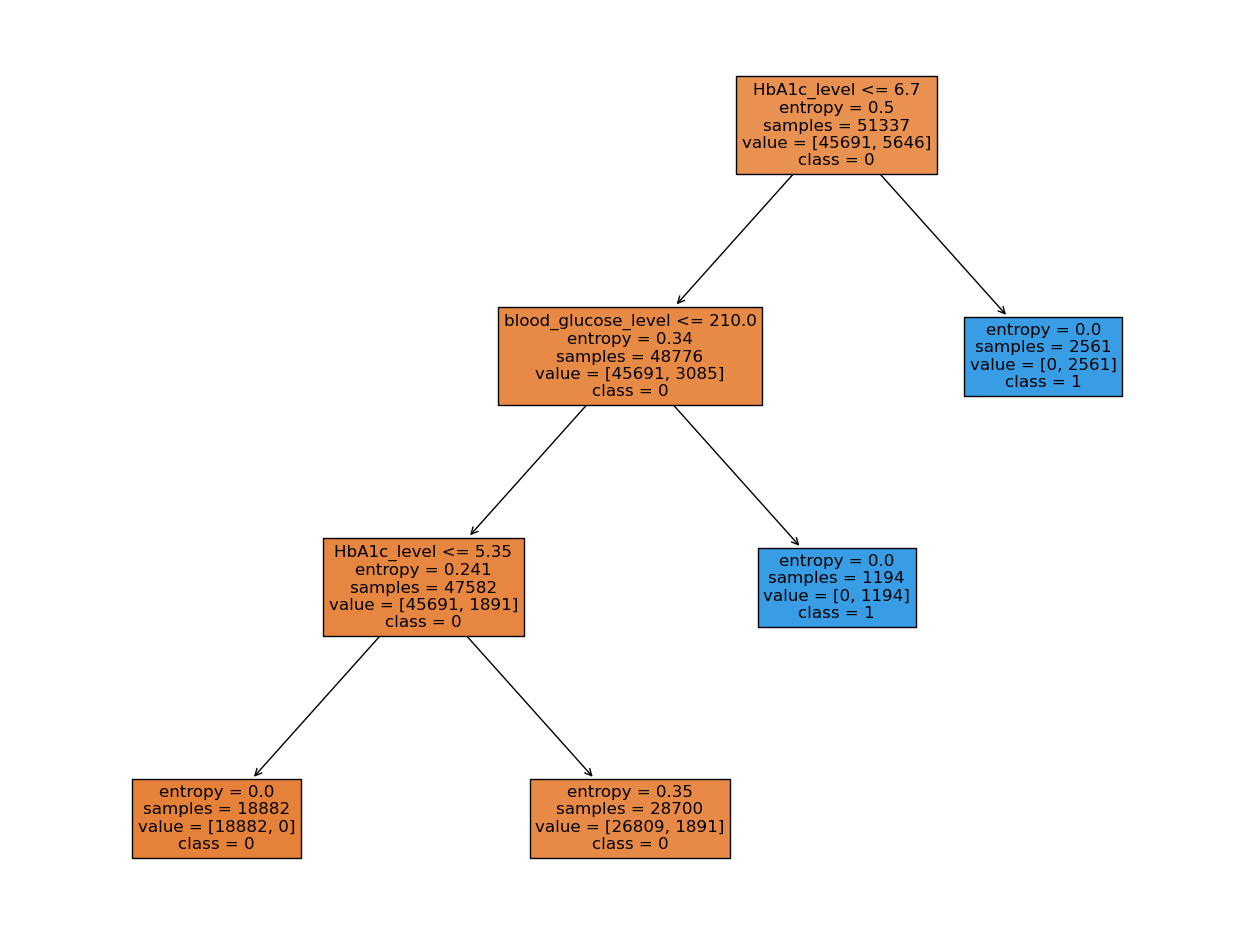

In [41]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,12))
a = plot_tree(dtree, feature_names=df.columns.tolist(), fontsize=12, filled=True, 
              class_names=['0', '1'])

In [42]:
dtree.score(X_test, y_test)

0.9638488507985976

<h4 style='color: red; text-align: center'>Let's use multiple machine learning models to evaluate the most performant model for our dataset by applying <mark> GridSearchCV.</mark></h4>

In [43]:
from sklearn.model_selection import GridSearchCV

<h4 style='color: red; text-align: center'>The machine learning models whose performance we will evaluate.</h4>

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

<h4 style='color: red; text-align: center'> Models and their Parameters</h4>

In [45]:
model_params={

    'rfc':{
        'model': RandomForestClassifier(criterion='entropy'),
        'params': {'n_estimators':[1,5,10]}
    },
    'log_re':{
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params':{'C':[1,5,10]}
    },
    'lin_re':{
        'model': LinearRegression(),
        'params':{}
    },
    'gnb':{
        'model':GaussianNB(),
        'params':{}
    },
    'mnb':{
        'model':MultinomialNB(),
        'params':{}
    },
    'tree':{
        'model': DecisionTreeClassifier(),
        'params':{
            'criterion':['entropy', 'gini']
        }
    }

}

In [46]:
scores=[]

for model_names, mp in model_params.items():
    clf=GridSearchCV(mp['model'], mp['params'], cv=4, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_names,
        'best_score':clf.best_score_,
        'best_params': clf.best_params_
    })

<h4 style='color: red; text-align: center'>Models with their score and best parameters</h4>

In [48]:
df=pd.DataFrame(scores, columns=['model', 'best_score','best_params'])
df

,model,best_score,best_params
0,rfc,0.960399,{'n_estimators': 10}
1,log_re,0.949374,{'C': 5}
2,lin_re,0.385770,{}
3,gnb,0.899721,{}
4,mnb,0.864113,{}
5,tree,0.940238,{'criterion': 'entropy'}


<h4 style='color: red; text-align: center'>So, the model with the highest performance is the RandomForestClassifier with a score of <b>0.960399	</b></h4>

In [49]:
rfc=RandomForestClassifier(n_estimators=10, criterion='entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [50]:
rfc.score(X_test, y_test)

0.9603428126217375

<h4 style='color: red; text-align: center'>Metrics</h4>

In [51]:
y_pred=rfc.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(y_test, y_pred)
print('Accuracy=', accuracy)

Accuracy= 0.9603428126217375


In [54]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[11361,    74],
       [  435,   965]], dtype=int64)

Text(0.5, 1.0, 'Truth and Prediction Matrix')

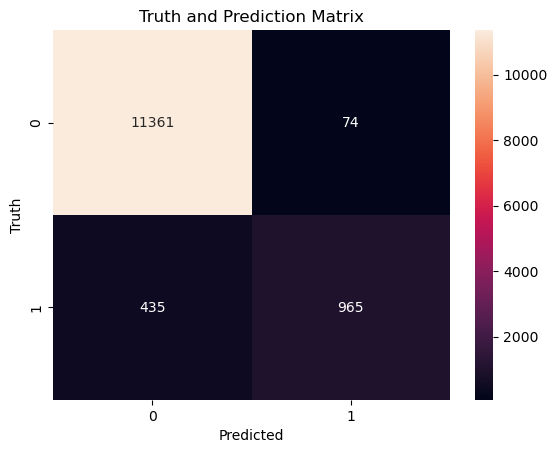

In [55]:
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Truth and Prediction Matrix")